# Shallow Net in Keras

Bulding a Shallow Neural Network to classify MNIST digits.

#### Set seed for reproducibility

In [ ]:
import numpy as np
np.random.seed(42)

#### Load dependencies

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import regularizers
from keras.callbacks import TensorBoard

#### Load data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

In [ ]:
y_train[0:99]

In [ ]:
X_test[0]
y_test[0]

In [ ]:
y_test.shape

In [ ]:
X_test.shape

#### Preprocess data
Flatten and normalise input data.

In [ ]:
X_train = X_train.reshape(60000, 28 * 28 * 1).astype('float32')
X_test = X_test.reshape(10000, 28 * 28 * 1).astype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
X_train[0]

In [ ]:
# One-hot encoded categories
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [ ]:
y_train[0]

#### Design Neural Network architecture

In [ ]:
# Initialiser: zeros; random_uniform; glorot_uniform; and he_uniform.
# Regularisers: L2; and Dropout

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (28 * 28 * 1,),
                kernel_initializer='glorot_uniform'))
model.add(Dense((10), activation = 'softmax'))

In [ ]:
model.summary()

#### Configure model

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = SGD(lr=0.01), metrics = ['accuracy'])

#### Train!

In [ ]:
model.fit(X_train, y_train, batch_size = 128, epochs = 5, verbose = 1, validation_split = 0.1)

#### Test Predictions

In [ ]:
predictions = model.predict_classes(X_test, verbose = 2)
print(predictions)

#### Test Final Accuracy

In [ ]:
final_loss, final_acc = model.evaluate(X_test, y_test, verbose = 1)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

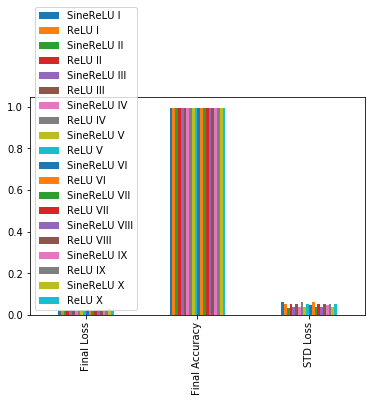

In [1]:
import pandas as pd
import matplotlib as plt

from bokeh.io import output_notebook
from bokeh.plotting import show, figure

%matplotlib inline

dict = {
    'SineReLU I' : [0.0165, 0.9955, 0.06088266993619909],
    'ReLU I' : [0.0198, 0.9953, 0.0513015402055947],
    'SineReLU II': [0.0178, 0.9953, 0.031123579642053544],
    'ReLU II': [0.0171, 0.9950, 0.05160333132791024],
    'SineReLU III': [0.0219, 0.9951, 0.039008660080991936],
    'ReLU III': [0.0175, 0.9949, 0.05137603702953306],
    'SineReLU IV': [0.0187, 0.9951, 0.03877249134269196],
    'ReLU IV': [0.0169, 0.9949, 0.062474066324653695],
    'SineReLU V': [0.0219, 0.9950, 0.03873494273164828],
    'ReLU V': [0.0188, 0.9948, 0.05117469446671811],
    'SineReLU VI': [0.0226, 0.9949, 0.04668065399692338],
    'ReLU VI': [0.0183, 0.9948, 0.06229350002699803],
    'SineReLU VII': [0.0198, 0.9948, 0.03873106513834456],
    'ReLU VII': [0.0200, 0.9947, 0.0518143238303546],
    'SineReLU VIII': [0.0211, 0.9947, 0.03859305980087429],
    'ReLU VIII': [0.0205, 0.9944, 0.05140083084888308],
    'SineReLU IX': [0.0197, 0.9947, 0.04621584269327811],
    'ReLU IX': [0.0215, 0.9944, 0.050828379242350834],
    'SineReLU X': [0.0255, 0.9946, 0.038892913983921855],
    'ReLU X': [0.0202, 0.9943, 0.05040060172009972]
    }
index = ['Final Loss','Final Accuracy', 'STD Loss']
columns = ['SineReLU I', 'ReLU I',
           'SineReLU II', 'ReLU II',
           'SineReLU III', 'ReLU III',
           'SineReLU IV', 'ReLU IV',
           'SineReLU V', 'ReLU V',
           'SineReLU VI', 'ReLU VI',
           'SineReLU VII', 'ReLU VII',
           'SineReLU VIII', 'ReLU VIII',
           'SineReLU IX', 'ReLU IX',
           'SineReLU X', 'ReLU X']

benchmarking = pd.DataFrame(dict, index = index, columns = columns)
benchmarking.plot(kind='bar')